In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
data = pd.read_csv("data.csv")

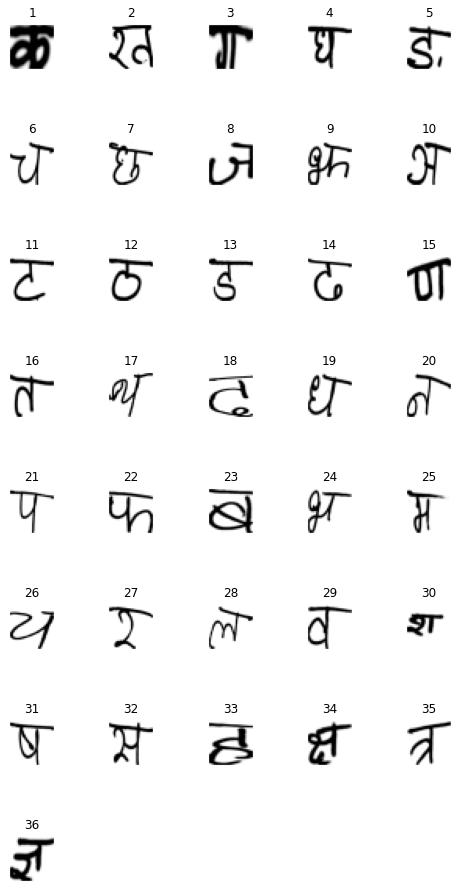

In [3]:
char_names = data.character.unique()  
rows =8;columns=5
fig, ax = plt.subplots(rows,columns, figsize=(8,16))
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col])

            
plt.subplots_adjust(wspace=1, hspace=1)   
plt.show()


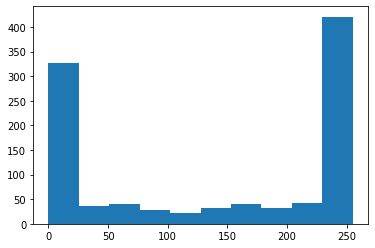

In [4]:
import matplotlib.pyplot as plt
plt.hist(data.iloc[0,:-1])
plt.show()

In [5]:
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [6]:
del data
n_classes = 36

In [7]:
# Let's split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = to_categorical(y_train, n_classes)
y_test = to_categorical(y_test, n_classes)

In [8]:
img_height_rows = 32
img_width_cols = 32

In [9]:
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape) # Python TIP :the * operator unpacks the tuple
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [10]:
cnn = Sequential()

In [11]:
kernelSize = (3, 3)
ip_activation = 'relu'
ip_conv_0 = Conv2D(filters=32, kernel_size=kernelSize, input_shape=im_shape, activation=ip_activation)
cnn.add(ip_conv_0)

In [12]:
# Add the next Convolutional+Activation layer
ip_conv_0_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_0_1)

# Add the Pooling layer
pool_0 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_0)

In [13]:
ip_conv_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1)
ip_conv_1_1 = Conv2D(filters=64, kernel_size=kernelSize, activation=ip_activation)
cnn.add(ip_conv_1_1)

pool_1 = MaxPool2D(pool_size=(2, 2), strides=(2, 2), padding="same")
cnn.add(pool_1)

In [14]:
# Let's deactivate around 20% of neurons randomly for training
drop_layer_0 = Dropout(0.2)
cnn.add(drop_layer_0)

In [15]:
flat_layer_0 = Flatten()
cnn.add(Flatten())

In [16]:
# Now add the Dense layers
h_dense_0 = Dense(units=128, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_0)
# Let's add one more before proceeding to the output layer
h_dense_1 = Dense(units=64, activation=ip_activation, kernel_initializer='uniform')
cnn.add(h_dense_1)

In [17]:
op_activation = 'softmax'
output_layer = Dense(units=n_classes, activation=op_activation, kernel_initializer='uniform')
cnn.add(output_layer)

In [18]:
opt = 'adam'
loss = 'categorical_crossentropy'
metrics = ['accuracy']
# Compile the classifier using the configuration we want
cnn.compile(optimizer=opt, loss=loss, metrics=metrics)

In [19]:
print(cnn.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 64)          0

In [25]:
history = cnn.fit(x_train, y_train,
                  batch_size=32, epochs=10,
                  validation_data=(x_test, y_test))

Epoch 1/10
1575/1575 [==============================] - 193s 113ms/step - loss: 1.3802 - accuracy: 0.6031 - val_loss: 0.2795 - val_accuracy: 0.9144
Epoch 2/10
1575/1575 [==============================] - 178s 113ms/step - loss: 0.2251 - accuracy: 0.9290 - val_loss: 0.1433 - val_accuracy: 0.9565
Epoch 3/10
1575/1575 [==============================] - 179s 114ms/step - loss: 0.1321 - accuracy: 0.9569 - val_loss: 0.1241 - val_accuracy: 0.9631
Epoch 4/10
1575/1575 [==============================] - 148s 94ms/step - loss: 0.0974 - accuracy: 0.9689 - val_loss: 0.1059 - val_accuracy: 0.9689
Epoch 5/10
1575/1575 [==============================] - 137s 87ms/step - loss: 0.0751 - accuracy: 0.9767 - val_loss: 0.1090 - val_accuracy: 0.9674
Epoch 6/10
1575/1575 [==============================] - 172s 109ms/step - loss: 0.0582 - accuracy: 0.9809 - val_loss: 0.0834 - val_accuracy: 0.9755
Epoch 7/10
1575/1575 [==============================] - 185s 118ms/step - loss: 0.0545 - accuracy: 0.9823 - val_lo

In [20]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(cnn,'./models')

In [30]:
scores = cnn.evaluate(x_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 97.81%


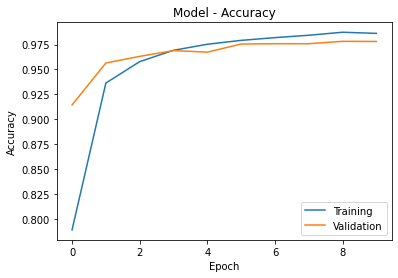

In [31]:
# Accuracy
print(history)
fig1, ax_acc = plt.subplots()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model - Accuracy')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show()

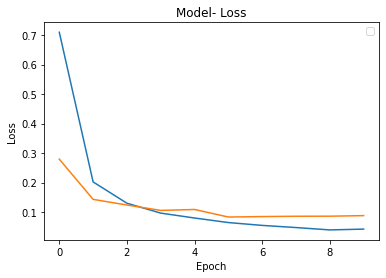

In [32]:
# Loss
fig2, ax_loss = plt.subplots()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model- Loss')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()